<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Библиотеки" data-toc-modified-id="Библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Библиотеки</a></span></li><li><span><a href="#Считывание-и-процессинг" data-toc-modified-id="Считывание-и-процессинг-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Считывание и процессинг</a></span></li><li><span><a href="#Расчет-метрик" data-toc-modified-id="Расчет-метрик-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет метрик</a></span></li><li><span><a href="#Мерж-с-метриками" data-toc-modified-id="Мерж-с-метриками-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Мерж с метриками</a></span></li><li><span><a href="#Аналитические-метрики" data-toc-modified-id="Аналитические-метрики-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Аналитические метрики</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Доп.-задание-1" data-toc-modified-id="Доп.-задание-1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Доп. задание 1</a></span></li><li><span><a href="#Доп.-задание-2" data-toc-modified-id="Доп.-задание-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Доп. задание 2</a></span><ul class="toc-item"><li><span><a href="#Метод-1:-Частотный-метод" data-toc-modified-id="Метод-1:-Частотный-метод-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Метод 1: Частотный метод</a></span><ul class="toc-item"><li><span><a href="#Шаги:" data-toc-modified-id="Шаги:-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Шаги:</a></span></li></ul></li><li><span><a href="#Метод-2:-Байесовский-подход" data-toc-modified-id="Метод-2:-Байесовский-подход-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Метод 2: Байесовский подход</a></span><ul class="toc-item"><li><span><a href="#Шаги:" data-toc-modified-id="Шаги:-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Шаги:</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Дополнительные-данные-для-более-точного-байесовского-подхода" data-toc-modified-id="Дополнительные-данные-для-более-точного-байесовского-подхода-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Дополнительные данные для более точного байесовского подхода</a></span></li></ul></li></ul></div>

Данные взяты: https://www.kaggle.com/datasets/zanjibar/100-million-data-csv

## Библиотеки

In [1]:
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import dask.array as da
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import pingouin as pg
from numpy import mean, std
from scipy.stats import ttest_ind

C:\CONDA\envs\practicum\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


## Считывание и процессинг

Считываем файл или тянем данные по ссылке и далее процессим данные

●	удалить пустые / na строки

●	удалить дубли

●	строки в которых нет цифр превратить в пустые

●	удалить записи в промежутке от 1 до 3 часов ночи

In [2]:
cluster = LocalCluster(n_workers=10, threads_per_worker=4, memory_limit='10GB')
client = Client(cluster)

2024-06-30 03:15:26,376 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 408b9be36ba32f3ad63979a1fa12407f initialized by task ('shuffle-transfer-408b9be36ba32f3ad63979a1fa12407f', 54) executed on worker tcp://127.0.0.1:63481
2024-06-30 03:15:53,349 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 408b9be36ba32f3ad63979a1fa12407f deactivated due to stimulus 'task-finished-1719706553.3439841'
2024-06-30 03:16:04,789 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 75b7132750d0fb09c7fb08adb76e9b6f initialized by task ('shuffle-transfer-75b7132750d0fb09c7fb08adb76e9b6f', 18) executed on worker tcp://127.0.0.1:63469
2024-06-30 03:16:22,984 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 75b7132750d0fb09c7fb08adb76e9b6f deactivated due to stimulus 'task-finished-1719706582.98302'
2024-06-30 03:16:33,702 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 408b9be36ba32f3ad63979a1fa12407f initialized by task ('shuffle-transfer-408b9be36ba32f

In [3]:
# Чтение файла CSV в dask DataFrame
data = dd.read_csv('data2.csv')

In [4]:
def info_data(data):
    data.info()
    return data.head()

def clear_data(data):
    print('Данные до очистки')
    print('Пропущенные значения')
    print(data.isna().sum().compute())
    
    # Удаление строк, где значение в столбце 'country' пустое
    data = data[data['country'] != '']
        
    # Удаление пропущенных значений в столбцах с типами object, int и datetime
    data = data.dropna(subset=['country', 'q2', 'value', 'date'])
    
    # Преобразование из object в datetime
    data['date'] = dd.to_datetime(data['date'], errors='coerce')
    
    # Фильтрация записей вне промежутка от 1 до 3 часов ночи
    data = data[~((data['date'].dt.hour >= 1) & (data['date'].dt.hour < 3))]
    
    # Удаление дубликатов
    data = data.drop_duplicates()
    
    print('Данные после очистки')
    print('Пропущенные значения')
    print(data.isna().sum().compute())
    
    return data

In [5]:
info_data(data)

<class 'dask_expr.DataFrame'>
Columns: 4 entries, q2 to country
dtypes: object(2), float64(2)

,q2,value,date,country
0,1590.0,4154.0,1988-01-21 01:55:38.551809,Austria
1,4500.0,2565.0,NaN,NaN
2,3000.0,757.0,1988-01-16 10:03:59.220797,Tunisia
3,26000.0,40668.0,1988-01-21 00:36:39.246963,NaN
4,5.0,8070.0,1988-01-18 22:18:19.006359,NaN


In [6]:
data = clear_data(data)
info_data(data)

Данные до очистки
Пропущенные значения
q2         13747426
value      13744905
date       13744823
country    26111534
dtype: int64
Данные после очистки
Пропущенные значения
q2         0
value      0
date       0
country    0
dtype: int64
<class 'dask_expr.DataFrame'>
Columns: 4 entries, q2 to country
dtypes: datetime64[ns](1), object(1), float64(2)

,q2,value,date,country
523,28.0,660.0,1988-01-10 06:55:10.568798,Thailand
524,36.0,985.0,1988-01-02 17:47:25.878794,Venezuela
613,36482.0,9951.0,1988-01-21 00:01:13.352302,Senegal
713,81.0,2131.0,1988-01-06 05:27:47.591429,Russia
960,52.0,880.0,1988-01-10 05:42:29.816113,Burkina Faso


## Расчет метрик

Агрегация по времени, для каждого часа рассчитать

●	кол-во уникальных string

●	среднее и медиану для numeric

Так же напишите SQL запрос для выполнения подобных расчетов напрямую в базе данных. Можно его вставить в код в виде комментария.

In [7]:
# Группировка данных по часу и выполнение агрегации
aggregated_data = data.groupby(data['date'].dt.hour).agg({
    'country': lambda x: x.nunique(),  # Количество уникальных значений в столбце типа string
    'q2': ['mean', 'median'],   # Среднее и медиана для числового столбца 1
    'value': ['mean', 'median'],   # Среднее и медиана для числового столбца 2
})

# Преобразование агрегированных данных в pandas DataFrame для отображения
aggregated_data = aggregated_data.compute()

aggregated_data.head(10)

country             q2                value        
     <lambda>           mean median          mean  median
date                                                     
18        194  122126.602546  713.0  32108.987526  2477.0
16        194  123550.284645  716.0  32327.205644  2477.0
5         194  129427.124817  713.0  32490.581326  2477.0
20        194  125552.122865  716.0  32370.327206  2476.0
12        194  128416.034406  714.0  32505.225043  2475.0
6         194  131017.141816  717.0  32521.748028  2474.0
17        194  126140.044884  715.0  32464.002470  2475.0
23        194  130126.639435  713.0  32532.785812  2474.0
21        194  126312.104747  719.0  32815.570965  2478.0
3         194  126898.214945  715.0  32092.078923  2475.0

SELECT 

    EXTRACT(HOUR FROM date) AS hour,
    
    COUNT(DISTINCT country) AS unique_countries,
    
    AVG(q2) AS mean_q2,
    
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY q2) AS median_q2,
    
    AVG(value) AS mean_value,
    
    PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY value) AS median_value
    
FROM 

    data
    
WHERE 

    EXTRACT(HOUR FROM date) NOT BETWEEN 1 AND 2
    
GROUP BY 

    EXTRACT(HOUR FROM date)
    
ORDER BY 

    hour;

## Мерж с метриками

К каждой строке в исходном датасете примержить метрики ближайшего часа рассчитанные в предыдущем шаге

In [8]:
# Переименование столбцов в агрегированных данных для удобства объединения
aggregated_data.columns = ['country_unique', 'q2_mean', 'q2_median', 'value_mean', 'value_median']

# Преобразование времени для объединения по часу
data['hour'] = data['date'].dt.hour

# Объединение данных с метриками по часу
data = data.merge(aggregated_data, how='left', left_on='hour', right_index=True)

# Вывод первых 10 строк объединенного датасета
data.head(10)

,q2,value,date,country,hour,country_unique,q2_mean,q2_median,value_mean,value_median
523,28.0,660.0,1988-01-10 06:55:10.568798,Thailand,6,194,131017.141816,717.0,32521.748028,2474.0
524,36.0,985.0,1988-01-02 17:47:25.878794,Venezuela,17,194,126140.044884,715.0,32464.002470,2475.0
613,36482.0,9951.0,1988-01-21 00:01:13.352302,Senegal,0,194,126181.767636,716.0,32559.129988,2475.0
713,81.0,2131.0,1988-01-06 05:27:47.591429,Russia,5,194,129427.124817,713.0,32490.581326,2477.0
960,52.0,880.0,1988-01-10 05:42:29.816113,Burkina Faso,5,194,129427.124817,713.0,32490.581326,2477.0
1066,2000.0,2150.0,1988-01-07 14:24:51.309237,Trinidad and Tobago,14,194,127300.381242,714.0,32946.622735,2473.0
1256,65.0,461.0,1988-01-20 10:05:50.539419,Liechtenstein,10,194,127551.871239,716.0,32307.461512,2473.0
1420,0.0,1018.0,1988-01-07 21:06:37.141594,Cyprus,21,194,126312.104747,719.0,32815.570965,2478.0
2080,3.0,1239.0,1988-01-21 20:49:06.105541,Greece,20,194,125552.122865,716.0,32370.327206,2476.0
2185,4973.0,2262.0,1988-01-24 20:05:26.234493,Lesotho,20,194,125552.122865,716.0,32370.327206,2476.0


## Аналитические метрики

Для колонки numeric по полному датасету построить

●	Гистограмму

●	95% доверительный интервал, с комментарием как выбирали методику расчета

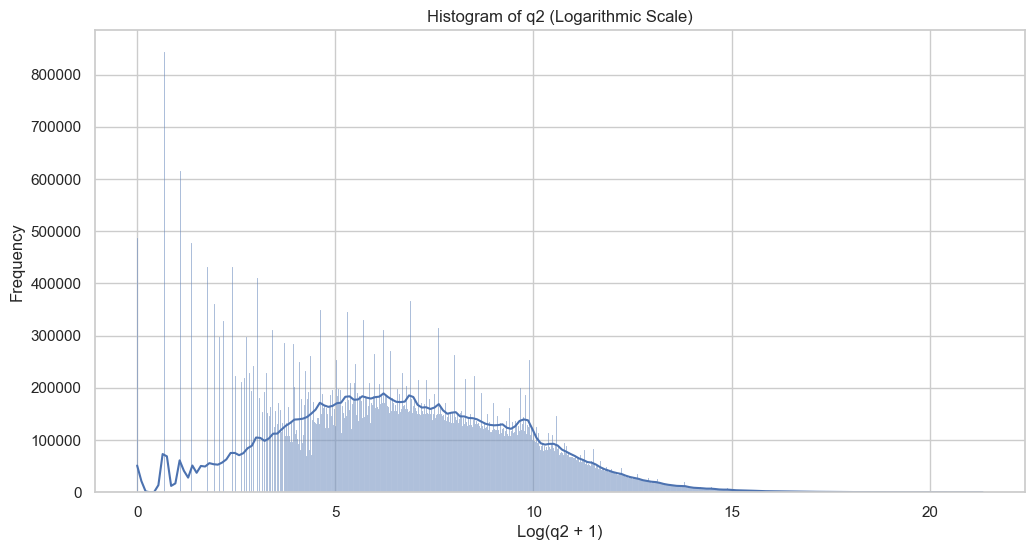

In [9]:
# Установка стиля для графиков
sns.set(style="whitegrid")

# Построение гистограммы с логарифмической шкалой
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(data['q2']), bins=1000, kde=True)
plt.title('Histogram of q2 (Logarithmic Scale)')
plt.xlabel('Log(q2 + 1)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Преобразование данных к логарифмической шкале с использованием map_partitions
data_q2_log = data['q2'].map_partitions(lambda df: np.log1p(df))

# Функция для расчета бутстрап-доверительного интервала с использованием map_partitions
def bootstrap_confidence_interval_dask(data, num_samples=1000, confidence_level=0.95):
    # Создание бутстрап-выборок и расчет среднего
    def bootstrap_mean(partition):
        return np.mean(np.random.choice(partition, size=len(partition), replace=True))

    # Применение функции к каждой partition
    bootstrapped_means = data.map_partitions(bootstrap_mean, meta=('float')).compute()

    # Вычисление квантилей для доверительного интервала
    lower_bound = np.percentile(bootstrapped_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Вызов функции для расчета бутстрап-доверительного интервала с использованием dask.dataframe
lower_bound, upper_bound = bootstrap_confidence_interval_dask(data_q2_log.dropna(), num_samples=1000, confidence_level=0.95)

# Вычисление и печать результатов
print(f"95% Confidence Interval for q2 (Logarithmic Scale): ({lower_bound:.2f}, {upper_bound:.2f})")


C:\CONDA\envs\practicum\lib\site-packages\dask_expr\_expr.py:4007: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(
C:\CONDA\envs\practicum\lib\site-packages\dask_expr\_expr.py:4007: FutureWarning: Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.
  warnings.warn(


95% Confidence Interval for q2 (Logarithmic Scale): (6.70, 6.71)


**Комментарий по выбору методики расчета:**
Метод бутстрапа был выбран для расчета доверительного интервала, так как он не требует предположений о форме распределения данных. Данные q2, как видно из гистограммы, имеют распределение с выбросами и значительным разбросом, что делает использование классических методов, предполагающих нормальное распределение, менее надежным. Бутстрап позволяет оценить доверительный интервал более точно и подходит для больших наборов данных.

## Визуализация

1.	Отрисовать график среднего значения numeric колонки (y) по месяцам (x).
2.	Heatmap по частотности символов в колонке string

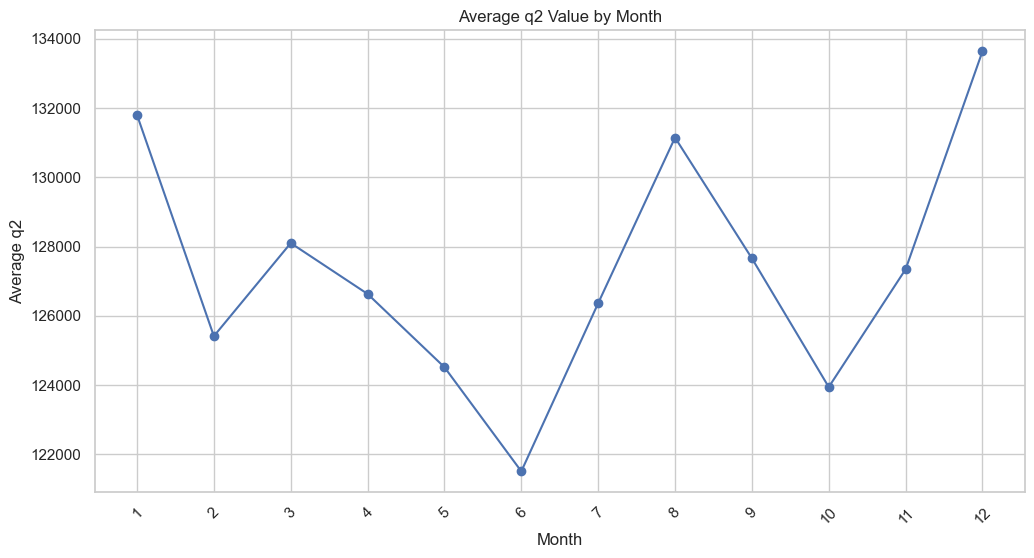

In [11]:
df_subset = data[['date', 'q2', 'country']].compute()
# Создание столбца 'month_year' для группировки по месяцам
df_subset['month_year'] = df_subset['date'].dt.month

# Группировка данных по месяцам и вычисление среднего значения q2 без вызова compute()
monthly_mean_q2 = df_subset.groupby('month_year')['q2'].mean().reset_index()

# Отрисовка графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_q2['month_year'], monthly_mean_q2['q2'], marker='o', linestyle='-')
plt.title('Average q2 Value by Month')
plt.xlabel('Month')
plt.ylabel('Average q2')
plt.grid(True)
plt.xticks(range(1, 13), rotation=45)  # Устанавливаем метки для каждого месяца от 1 до 12
plt.show()

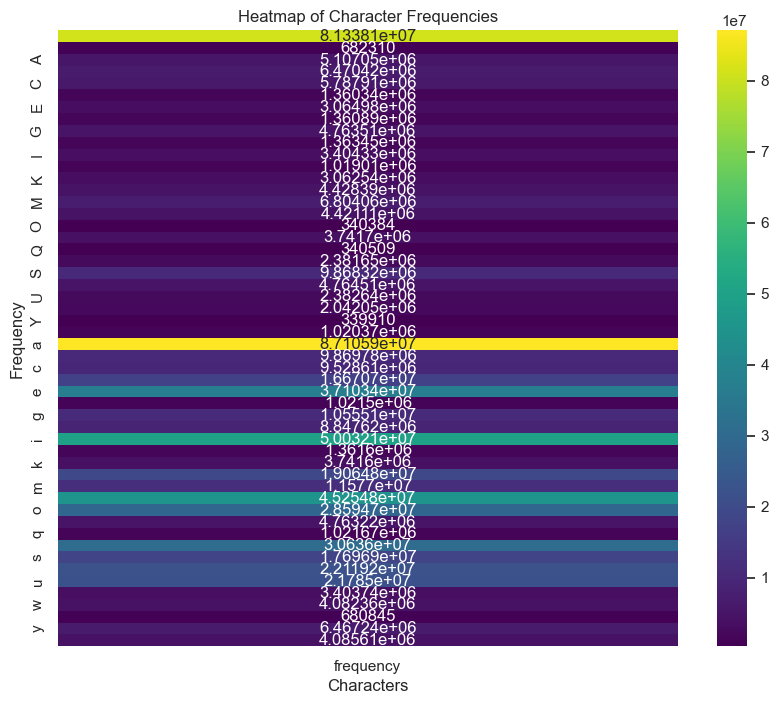

In [12]:
# Преобразуем все строки в один большой текст
all_text = ' '.join(df_subset['country'])

# Подсчитываем количество вхождений каждого символа
char_counts = Counter(all_text)

# Создаем DataFrame из подсчитанных значений
char_freq_df = pd.DataFrame.from_dict(char_counts, orient='index').reset_index()
char_freq_df.columns = ['character', 'frequency']

# Создаем матрицу частотности символов
char_matrix = pd.pivot_table(char_freq_df, values='frequency', index='character', aggfunc='sum').fillna(0)

# Создаем heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(char_matrix, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Character Frequencies')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

## Доп. задание 1

1.	Случайно поделить датасет на 3 части - в одной 25% записей, во второй 25% и 50% в третьей.
2.	Проверить на статистическую значимость различий для среднего по колонке numeric
3.	Оценить силу эффекта
4.	Проделать шаги 2 и 3 используя баесовский подход
5.	Кратко описать как выбирали методы расчета

In [13]:
# Первоначальное разделение на 50% и 50%
data_part1_and_part2, data_part3 = train_test_split(df_subset, test_size=0.5, random_state=42)

# Разделение первой половины на две части: 25% и 25%
data_part1, data_part2 = train_test_split(data_part1_and_part2, test_size=0.5, random_state=42)

# Проверяем размеры получившихся датасетов
print(f"Размер data_part1: {data_part1.shape}")
print(f"Размер data_part2: {data_part2.shape}")
print(f"Размер data_part3: {data_part3.shape}")


Размер data_part1: (16506184, 4)
Размер data_part2: (16506185, 4)
Размер data_part3: (33012370, 4)


In [14]:
# Выполняем t-тест для сравнения средних значений q2 между data_part1 и data_part2
statistic, p_value = ttest_ind(data_part1['q2'], data_part2['q2'], equal_var=False)  # Указываем equal_var=False, если дисперсии не равны

alpha = 0.05
print(f"Статистика t: {statistic}")
print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны")
else:
    print("Не отвергаем нулевую гипотезу: средние значения одинаковы")


Статистика t: 1.388017450053721
P-значение: 0.16513174092273725
Не отвергаем нулевую гипотезу: средние значения одинаковы


In [15]:
# Средние значения и стандартные отклонения для каждой выборки
mean_part1 = mean(data_part1['q2'])
mean_part2 = mean(data_part2['q2'])
std_part1 = std(data_part1['q2'])
std_part2 = std(data_part2['q2'])

# Оценка силы эффекта по t-тесту (коэффициент Коэна)
cohens_d = (mean_part1 - mean_part2) / ((std_part1 + std_part2) / 2)  # Используем среднее стандартное отклонение
print(f"Коэффициент Коэна: {cohens_d}")

Коэффициент Коэна: 0.000483348459366938


In [16]:
# Байесовский t-тест для сравнения средних значений q2 между data_part1 и data_part2
bayes_result = pg.ttest(data_part1['q2'], data_part2['q2'], paired=False, correction=True)

print(bayes_result)

               T           dof alternative     p-val               CI95%  \
T-test  1.388017  3.290717e+07   two-sided  0.165132  [-921.63, 5394.92]   

         cohen-d   BF10     power  
T-test  0.000483  0.001  0.284086  


## Доп. задание 2

Вводные
1.	Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных.
2.	Наша компания выпустила 200 прототипов из которых ни один не был успешен.

Какова вероятность что следующий (201й) наш прототип будет успешен? Какими методами можно решать данную задачу? Предложите как минимум 2 варианта. Если у вас есть какой-то вариант решения задачи для которого требуются доп. данные - перечислите что требуется и метод решения.

### Метод 1: Частотный метод

Частотный метод позволяет использовать частоту успехов конкурента для оценки вероятности успеха нашей компании. Поскольку у нас нет успешных прототипов, мы можем использовать данные конкурента как грубую оценку.

#### Шаги:

1. **Оценка вероятности успеха конкурента**:
   - Конкурент имеет 5 успешных прототипов из 1000. Вероятность успеха равна 5/1000 = 0.005 (0.5%).

2. **Применение этой вероятности к нашей компании**:
   - Предполагаем, что вероятность успеха нашей компании будет аналогична, то есть p = 0.005.

Таким образом, вероятность того, что наш следующий (201-й) прототип будет успешен, можно оценить как 0.5%.

### Метод 2: Байесовский подход

Байесовский подход позволяет использовать априорные знания и обновлять их с учетом новых данных. В данном случае мы будем использовать данные конкурента для построения априорного распределения и затем обновим его на основе данных нашей компании.

#### Шаги:

1. **Выбор априорного распределения**:
   - Мы выберем бета-распределение как априорное, которое часто используется для моделирования вероятности успеха.

2. **Обновление с использованием данных конкурента**:
   - Данные конкурента (5 успехов из 1000) можно интерпретировать как априорное распределение с параметрами (5+1,1000-5+1) = Beta(6, 996).

3. **Использование апостериорного распределения для нашей компании**:
   - У нас есть данные о 200 прототипах нашей компании с 0 успешными. Мы обновляем наше распределение с учетом этих данных, получая апостериорное распределение Beta(6, 996+200) = Beta(6, 1196).

4. **Оценка вероятности успеха следующего прототипа**:
   - Ожидаемое значение бета-распределения можно использовать для оценки вероятности успеха. Матожидание бета-распределения Beta(a, b) равно a/(a + b).
   - В нашем случае это 6/(6 + 1196)=0.005 (0.5%).

### Заключение

Оба метода дают приблизительно одинаковую оценку вероятности успеха следующего прототипа нашей компании, исходя из данных конкурента и наших наблюдений. Это значение составляет около 0.5%.

### Дополнительные данные для более точного байесовского подхода

Для более точного байесовского подхода можно использовать дополнительные данные:
1. **Историческая информация о вероятностях успеха в отрасли**.
2. **Дополнительные данные о разработке и характеристиках прототипов**.
3. **Отзывы пользователей и экспертов**.
4. **Инновационные особенности прототипов**.